<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml14_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도 학습(Unsupervised Learning)

## Imports

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Datasets

[Fruist 360](https://www.kaggle.com/datasets/moltean/fruits)

In [8]:
!wget https://bit.ly/fruits_300 -O fruits.npy       # 캐글 데이터 불러오기, -0 : Output

--2025-08-18 01:07:01--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2025-08-18 01:07:01--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2025-08-18 01:07:01--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443..

* Jupyter 노트북에서 Linux 명령어를 실행할 때 '!'로 시작.
* 'wget URL 주소 -O 파일이름' : URL주소의 파일을 다운로드 받아서 '파일이름'으로 저장.
* 확장자 npy 파일 : numpy 배열을 저장한 바이너리 파일.

In [9]:
fruits = np.load('fruits.npy')  # npy 형식의 파일을 읽어서 numpy 배열을 만듦.

In [12]:
fruits.shape    #> (300, 100, 100) -> (samples, width, height)

(300, 100, 100)

100 x 100 크기의 흑백 이미지 300개를 numpy 배열로 저장한 데이터셋.

## 데이터 시각화

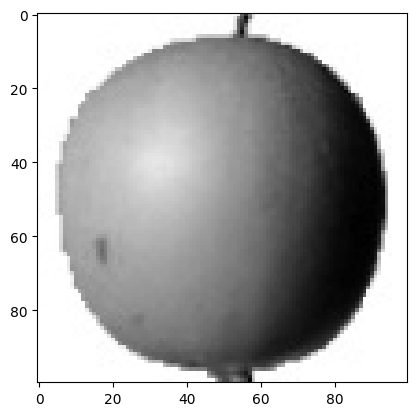

In [15]:
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

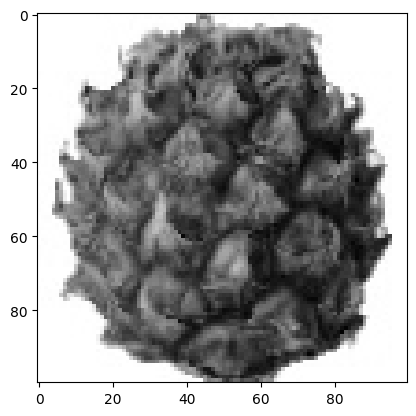

In [17]:
plt.imshow(fruits[100], cmap=plt.cm.binary)
plt.show()

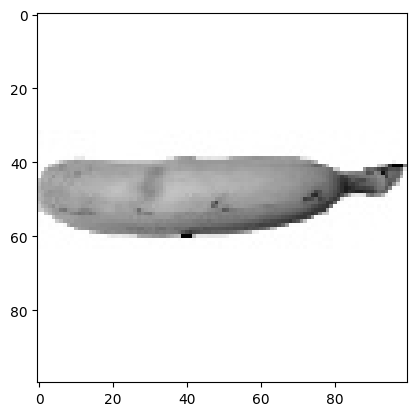

In [18]:
plt.imshow(fruits[200], cmap=plt.cm.binary)
plt.show()

첫 100개의 이미지를 10개 행, 10개 열로 배치해서 이미지 그려보세요.

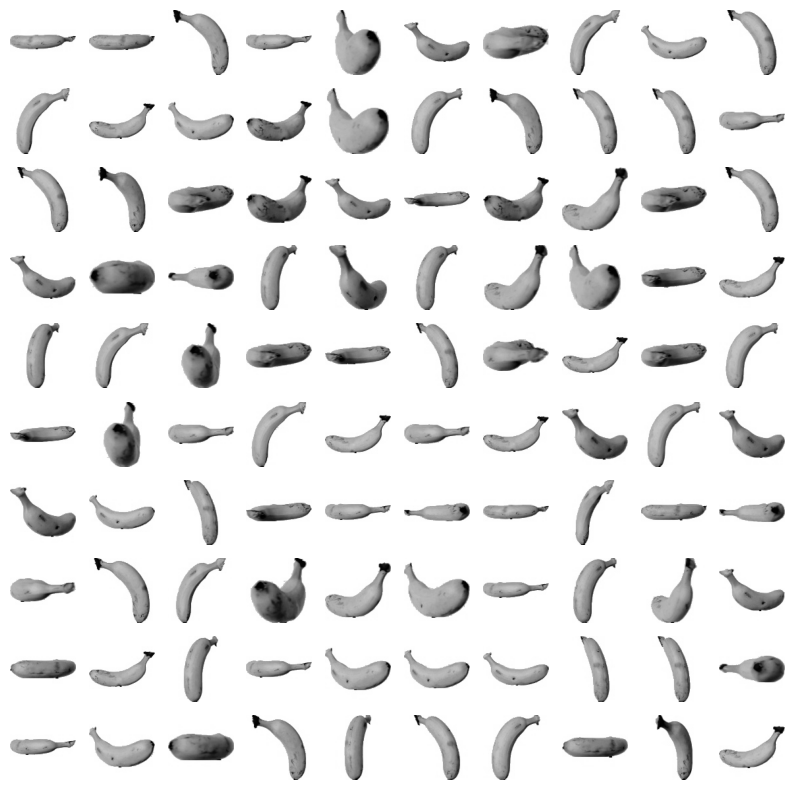

In [41]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

for row in range(10):
    for col in range(10):
        ax[row][col].imshow(fruits[200 + row * 10 + col], cmap=plt.cm.binary)
        ax[row][col].axis('off')


plt.show()

In [42]:
def plot_fruits(n_row=10, n_col=10, start=0):
    fig, ax = plt.subplots(nrows=n_row, ncols=n_col, figsize=(10, 10))
    for row in range(n_row):
        for col in range(n_col):
            ax[row][col].imshow(fruits[start + row * n_col + col], cmap=plt.cm.binary)
            ax[row][col].axis('off')

    plt.show()

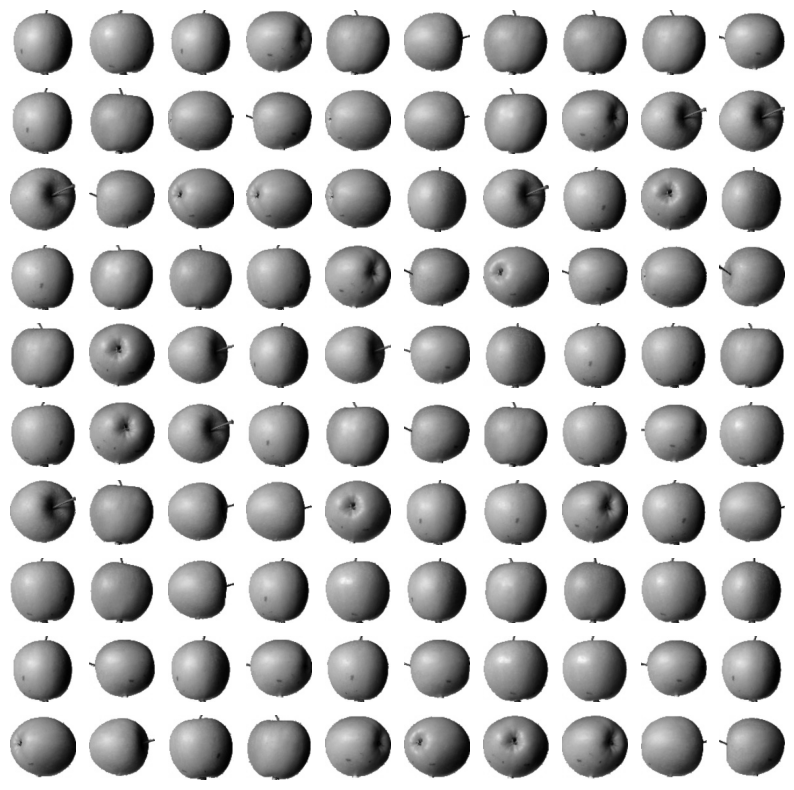

In [48]:
plot_fruits()

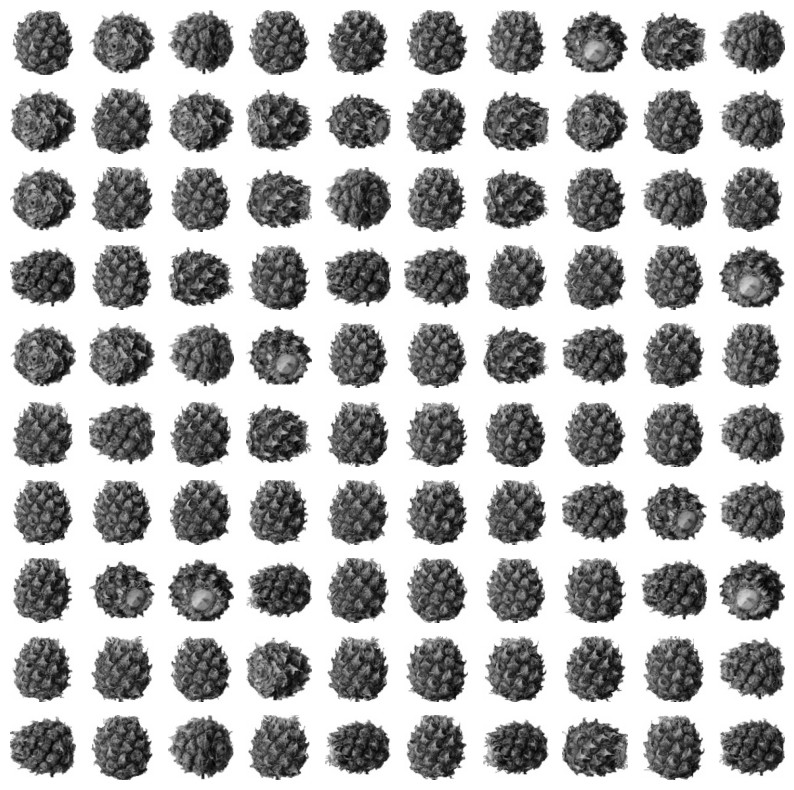

In [49]:
plot_fruits(start=100)

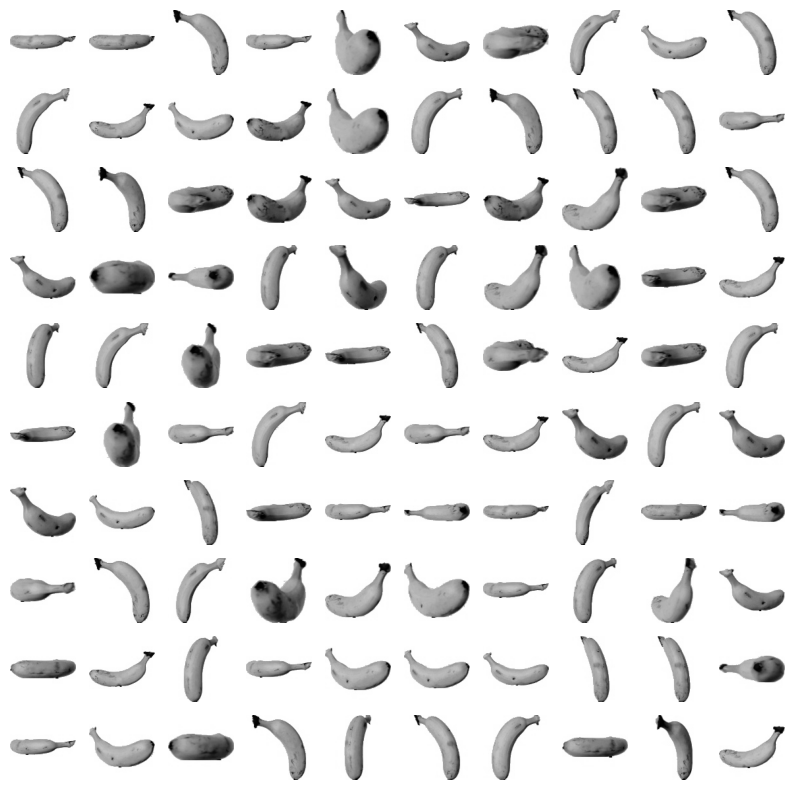

In [50]:
plot_fruits(start=200)

# 이미지 Pixel 분석

(samples, width, height) shape의 3차원 배열을 (samples, width x height) shape의 2차원 배열로 변환

In [58]:
# fruits_2d = fruits.reshape((300, 100 * 100))
fruits_2d = fruits.reshape((300, -1))   # (300, 100 * 100)

In [59]:
fruits_2d.shape

(300, 10000)

In [60]:
apples = fruits_2d[:100]    # 사과 이미지
pineapples = fruits_2d[100:200]     # 파인애플 이미지
bananas = fruits_2d[200:]     # 바나나 이미지

## 각 샘플에서 모든 픽셀의 평균값

In [61]:
apples.shape

(100, 10000)

In [62]:
apple_means = apples.mean(axis=1)

In [63]:
print(apple_means)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


In [65]:
len(apple_means)

100

In [66]:
pineapple_means = pineapples.mean(axis=1)
banana_means = bananas.mean(axis=1)

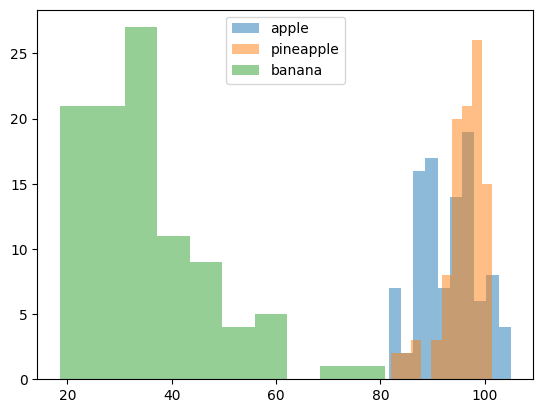

In [69]:
plt.hist(apple_means, alpha=0.5)
plt.hist(pineapple_means, alpha=0.5)
plt.hist(banana_means, alpha=0.5)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

## 각 픽셀의 평균

In [70]:
apple_px_means = apples.mean(axis=0)
pineapple_px_means = pineapples.mean(axis=0)
banana_px_means = bananas.mean(axis=0)

In [75]:
print(apple_px_means.shape)
print(pineapple_px_means.shape)
print(banana_px_means.shape)

(10000,)
(10000,)
(10000,)


픽셀 평균들의 막대 그래프

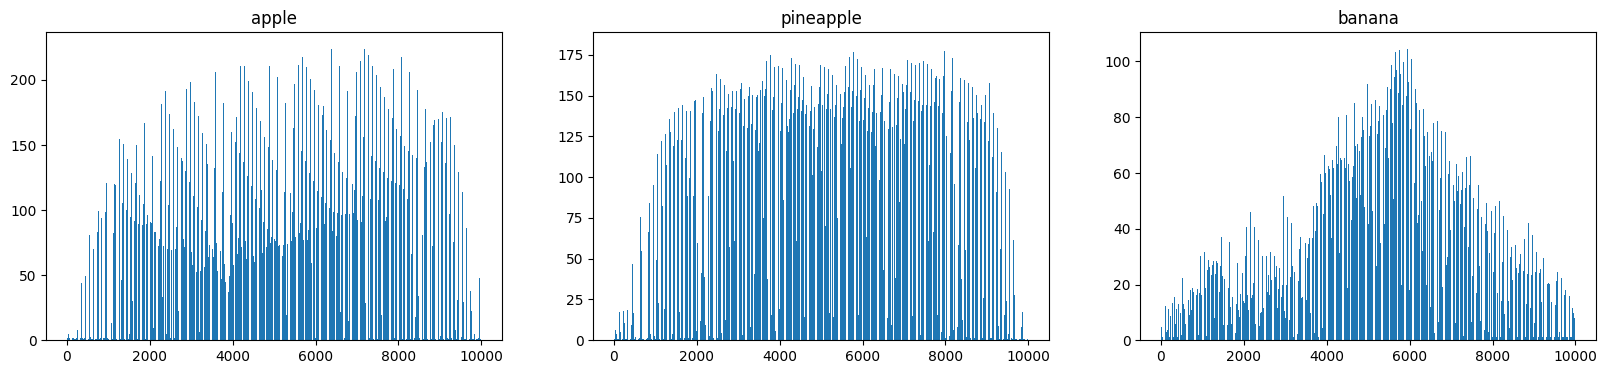

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
x = range(10_000)
ax[0].bar(x, apple_px_means)
ax[0].set_title('apple')
ax[1].bar(x, pineapple_px_means)
ax[1].set_title('pineapple')
ax[2].bar(x, banana_px_means)
ax[2].set_title('banana')

plt.show()

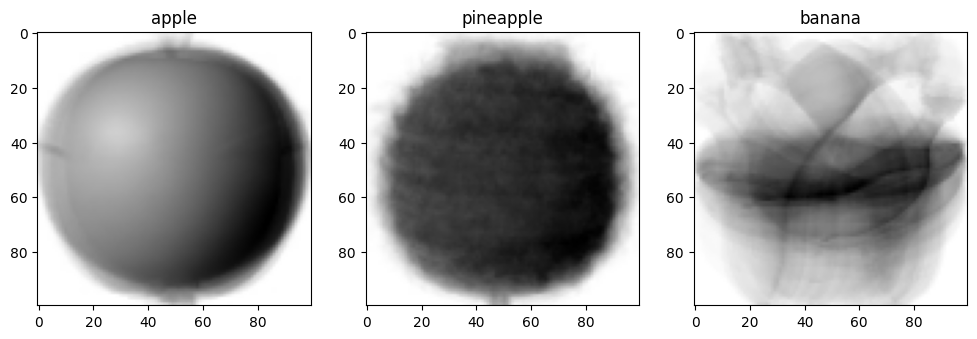

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].imshow(apple_px_means.reshape(100, 100), cmap=plt.cm.binary)
ax[0].set_title('apple')
ax[1].imshow(pineapple_px_means.reshape(100, 100), cmap=plt.cm.binary)
ax[1].set_title('pineapple')
ax[2].imshow(banana_px_means.reshape(100, 100), cmap=plt.cm.binary)
ax[2].set_title('banana')
plt.show()

## 각 픽셀의 평균값들과 가까운 이미지 찾기

In [81]:
fruits.shape

(300, 100, 100)

In [82]:
apple_px_means.shape

(10000,)

In [103]:
diff = np.abs(fruits - banana_px_means.reshape((100, 100)))     # broadcast 실행 fruits - apple_px_means.reshape((100, 100))

In [104]:
diff.shape

(300, 100, 100)

In [105]:
diff_mean = np.mean(diff, axis=(1, 2))

In [106]:
diff_mean.shape

(300,)

In [107]:
# 사과 픽셀 평균값과 차이가 작은 순서로 100개의 인덱스
apple_like_idx = np.argsort(diff_mean)[:100]
print(apple_like_idx)

[285 212 261 291 208 286 284 265 219 264 252 290 276 283 255 203 266 200
 201 269 247 256 281 270 211 254 268 239 299 225 250 275 280 232 246 205
 244 263 297 224 279 262 289 288 238 287 218 245 217 230 274 295 209 220
 213 267 237 229 248 278 243 204 228 206 207 272 210 241 233 222 214 253
 277 235 240 282 294 271 296 249 215 258 227 259 202 236 293 260 226 216
 292 257 221 298 251 223 242 231   9  88]


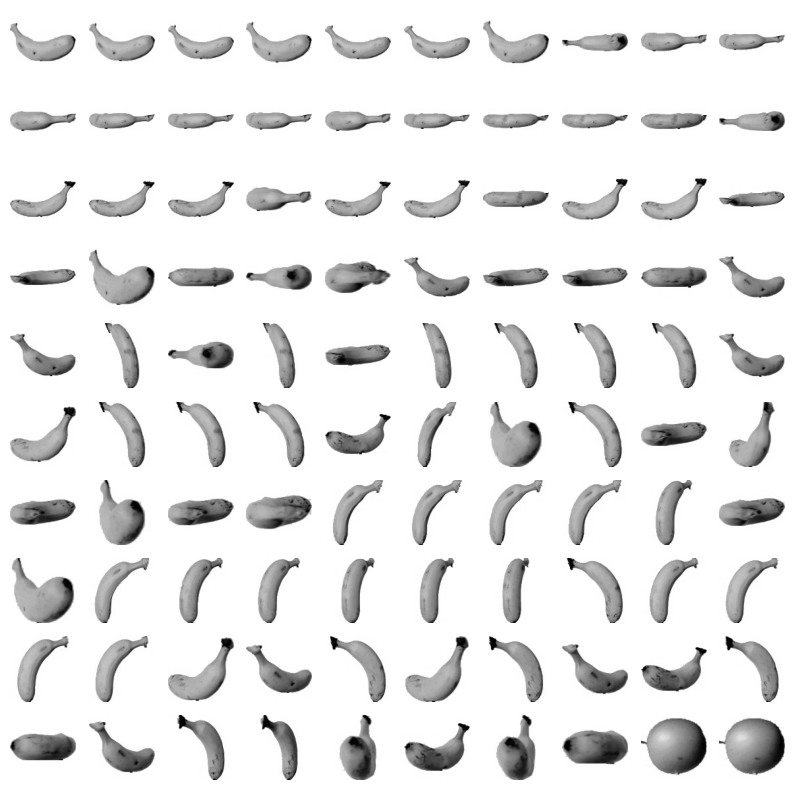

In [108]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

for row in range(10):
    for col in range(10):
        img = fruits[apple_like_idx[row * 10 + col]]
        ax[row, col].imshow(img, cmap=plt.cm.binary)
        ax[row, col].axis('off')
plt.show()

파인애플 이미지들의 각 픽셀 평균값과의 거리가 짧은 샘플

In [110]:
diff = np.abs(fruits - pineapple_px_means.reshape((100, 100)))
diff_mean = np.mean(diff, axis=(1, 2))
pineapple_like_idx = np.argsort(diff_mean)[:100]
print(pineapple_like_idx)

[111 152 164 137 136 129 166 150 165 101 174 192 117 140 182 184 148 181
 100 193 191 120 175 162 154 157 155 186 121 103 122 145 138 161 118 176
 160 127 144 156 158 105 104 102 188 124 112 198 185 177 133 125 131 109
 180 110 106 149 115 187 163 170 141 159 183 142 128 195 147 167 119 189
 190 151 135 169 123 171 143 168 107 113 108 139 130 197 134 116 199 172
  77 179 146 178 194 114 173 196  32  46]


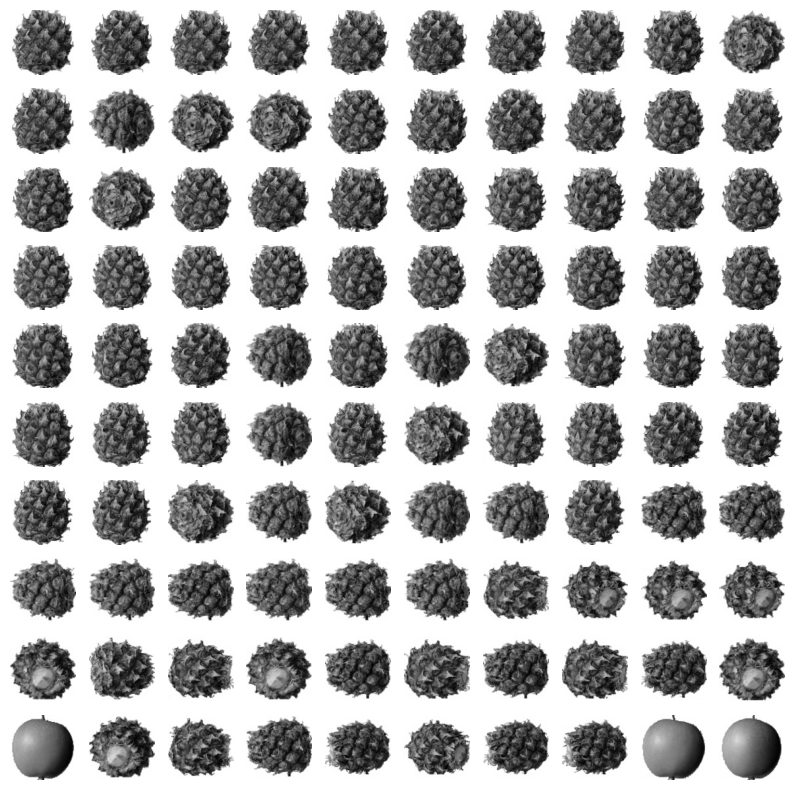

In [112]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        img = fruits[pineapple_like_idx[i * 10 + j]]
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()

바나나의 픽셀 평균들과 가까운 이미지

In [113]:
diff = np.abs(fruits - banana_px_means.reshape((100, 100)))
diff_mean = np.mean(diff, axis=(1, 2))
banana_like_idx = np.argsort(diff_mean)[:100]
print(banana_like_idx)

[285 212 261 291 208 286 284 265 219 264 252 290 276 283 255 203 266 200
 201 269 247 256 281 270 211 254 268 239 299 225 250 275 280 232 246 205
 244 263 297 224 279 262 289 288 238 287 218 245 217 230 274 295 209 220
 213 267 237 229 248 278 243 204 228 206 207 272 210 241 233 222 214 253
 277 235 240 282 294 271 296 249 215 258 227 259 202 236 293 260 226 216
 292 257 221 298 251 223 242 231   9  88]


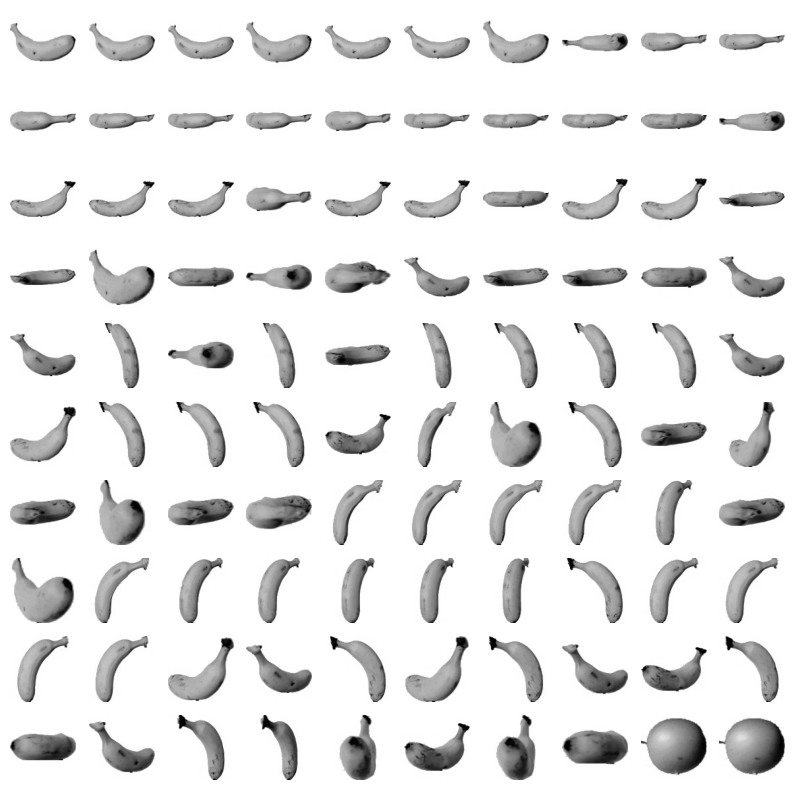

In [114]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        img = fruits[banana_like_idx[i * 10 + j]]
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()

# K-Mean 군집(clustering)

1. 무작위로 k개의 클러스터의 중심을 정함.
1. 각 샘플에서 가장 가까운 클러스터 중심을 찾아서 해당 클러스터의 샘플로 지정(군집화).
1. 각 클러스터에 속한 샘플들의 평균값으로 클러스터의 중심을 이동.
1. 바뀐 클러스터 중심으로 2번 과정(군집화)을 재수행.
1. 클러스터의 중심이 변하지 않을 때까지 3 ~ 4번 반복.

In [116]:
fruits.shape

(300, 100, 100)

In [117]:
fruits_2d.shape

(300, 10000)

In [128]:
# KMeans 클래스
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터를 설정해 군집 개수 설정

In [129]:
# 데이터 학습(훈련) - 비지도 학습 : 레이블(y)을 제공하지 않음.
kmeans.fit(X=fruits_2d)     # 2차원 배열로 만들어야함.

KMeans(n_clusters=3, random_state=42)

In [130]:
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [131]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

KMeans 알고리즘은 300개의 과일 이미지들을 112개, 98개, 90개의 샘플들로 이루어진 3개의 클러스터를 만들어 줌.

In [132]:
kmeans.labels_[kmeans.labels_ == 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [134]:
fruits[kmeans.labels_ == 0]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [138]:
print(len(fruits[kmeans.labels_ == 0]))
print(len(fruits[kmeans.labels_ == 1]))
print(len(fruits[kmeans.labels_ == 2]))

112
98
90


In [140]:
np.ceil(98 / 10)   # 11.2 -> 올림 -> 12.0 (실수)

np.float64(10.0)

In [142]:
def plot_cluster(arr):
    n = len(arr)    # 샘플 개수
    n_cols = 10     # 한 줄에 이미지를 10개씩 시각화
    n_rows = int(np.ceil(n / n_cols))   # axis의 행(row) 개수.
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_rows, n_cols))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = i * 10 + j
            if idx < n:     # 배열 인덱스는 배열 원수 개수보다 크면 안되기 때문에
                img = arr[idx]
                ax[i, j].imshow(img, cmap=plt.cm.binary)
            ax[i, j].axis('off')    # 모든 subplot의 축을 제거
    plt.show()

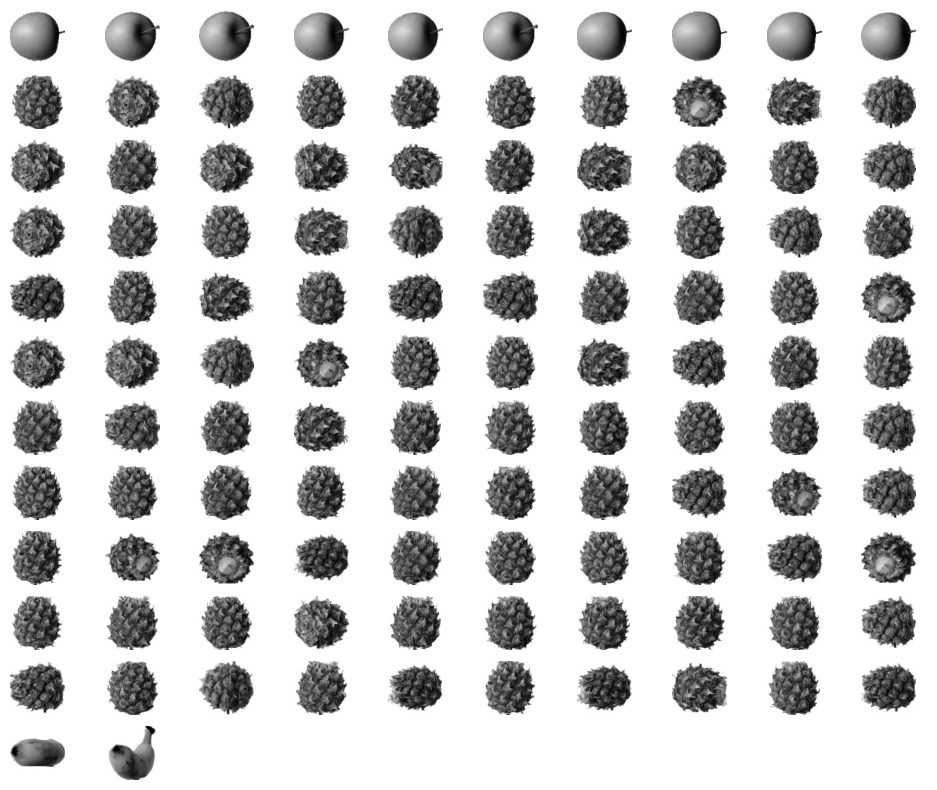

In [143]:
plot_cluster(fruits[kmeans.labels_ == 0])

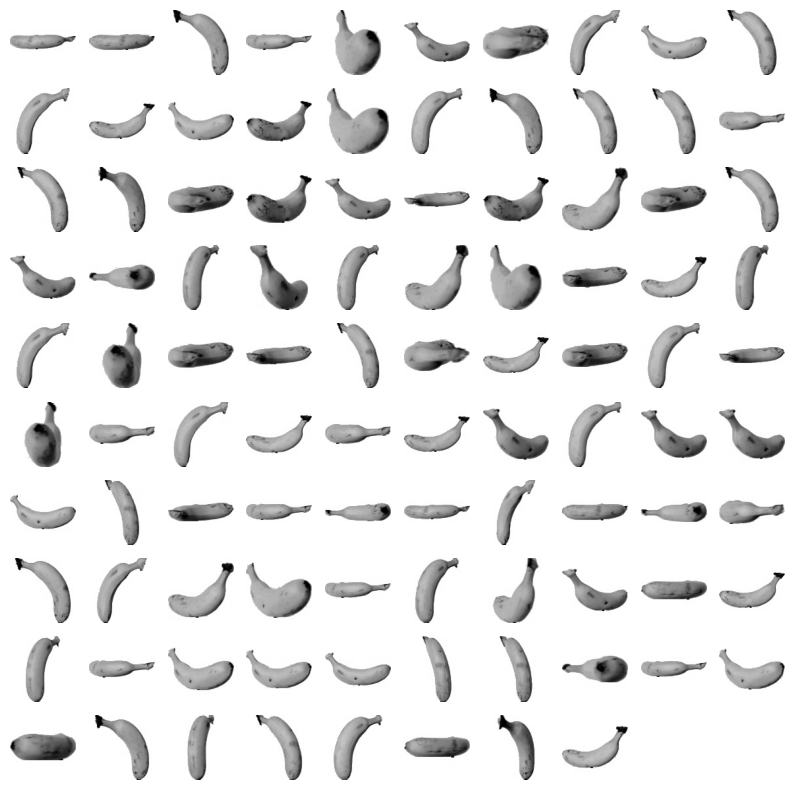

In [144]:
plot_cluster(fruits[kmeans.labels_ == 1])

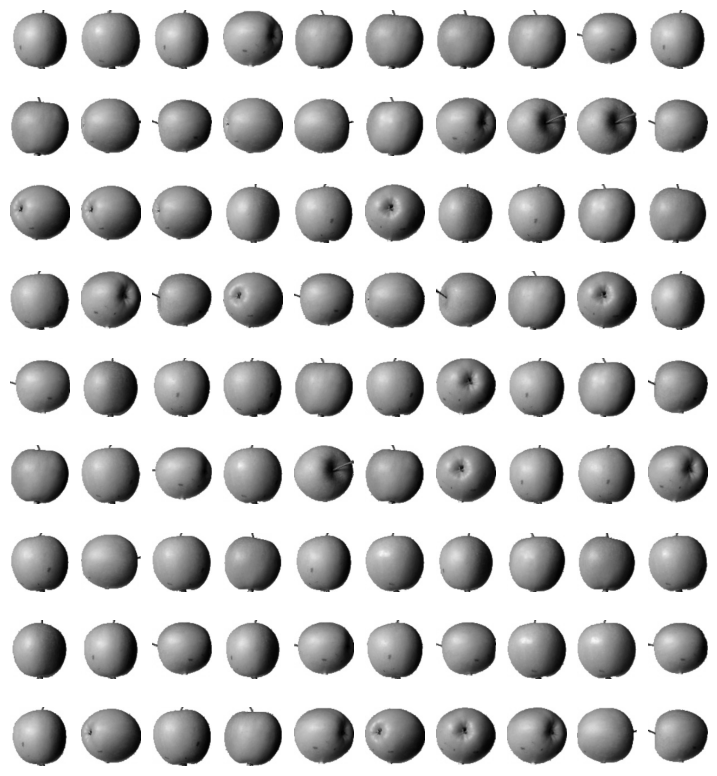

In [145]:
plot_cluster(fruits[kmeans.labels_ == 2])

## KMenas 알고리즘이 찾은 최종 클러스터 중심

In [146]:
kmeans.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]])

In [149]:
kmeans.cluster_centers_.shape   #> (3, 10000) -> (클러스터 개수, 특성 개수)

(3, 10000)

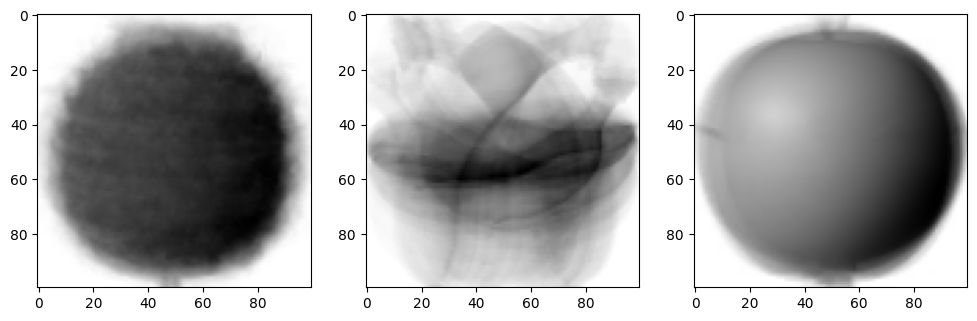

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    ax[i].imshow(center.reshape(100, 100), cmap=plt.cm.binary)

plt.show()

## 각 샘플에서 클러스터 중심까지의 거리

In [152]:
distances = kmeans.transform(X=fruits_2d)

In [154]:
distances.shape     #> (300, 3) -> (샘플 개수, 각 클러스터 중심까지의 거리 개수)

(300, 3)

In [156]:
distances[0]    # 첫번째 샘플(이미지)에서 각 클러스터 중심까지의 거리들

array([4661.3649493 , 8642.61845541, 3094.2021583 ])

In [157]:
predicts = kmeans.predict(X=fruits_2d)

In [159]:
predicts.shape  #> (300,) -> 300개 샘플(이미지)의 예측 값.

(300,)

In [160]:
predicts[0]     #> 가장 짧은 거리의 클러스터로 예측.

np.int32(2)

* `KMeans.transform(X)` : 특성 배열의 샘플에서 각 클러스터 중심까지의 거리들을 리턴.
* `KMeans.predict(X)` : 가장 가까운 클러스터의 레이블(인덱스)을 리턴.

## 최적의 k값을 찾기

In [162]:
# inertia : 클러스터 중심과 클러스터에 속한 샘플들 사이의 거리들의 제곱의 합.
# 클러스터에 속한 샘플들이 얼마나 가까이 모여 있는 지를 나타내는 값.
kmeans.inertia_     # k값이 커질수록 inertia의 값은 점점 더 작아짐.

5075273831.931915

In [164]:
inertias = []   # 클러스터 개수에 따른 inertia를 저장하기 위한 변수
k_values = np.arange(1, 11) # 클러스터 개수 : 1 ~ 10
# k_values를 사용해서 KMeans 객체 생성 -> 훈련 -> intertia_ 값을 리스트에 저장.
# inertias를 시각화(선 그래프)

In [169]:
for k in k_values:
    kmeans_value = KMeans(n_clusters=k, random_state=42)
    kmeans_value.fit(X=fruits_2d)
    inertias.append(kmeans_value.inertia_)

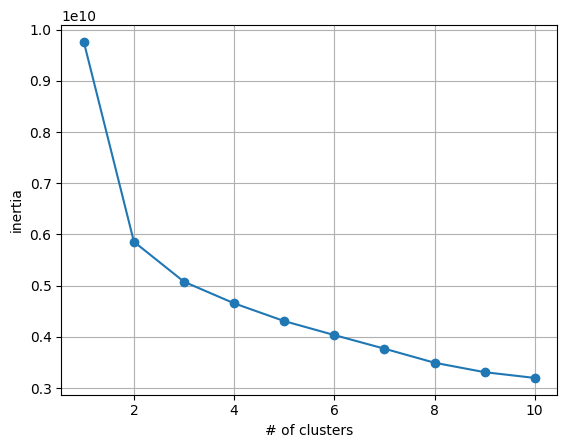

In [180]:
plt.plot(k_values, inertias, 'o-')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

클러스터의 개수를 변화시켜 가면서 계산된 inertia를 시각화해보면 elbow(기울기가 급격하게 바뀌는 부분)가 보이는 경우가 일반적. 그 때의 클러스터 개수가 최적의 클러스터 개수.

# MNIST 데이터 셋 KMeans

* MNIST(숫자 손글씨 이미지들) 데이터셋 준비
* KMeans 과정(2~20)을 수행하면서 최적의 클러스터 개수를 찾음.
* 찾은 각 클러스터의 중심을 시각화

In [226]:
# MNIST 데이터셋 준비
from sklearn import datasets
mnist = datasets.fetch_openml('mnist_784')

In [227]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [228]:
# 데이터 특성 준비
X = mnist['data']

In [229]:
k_values = np.arange(2, 20)
inertias = []

for k in k_values:
    kmeans_mnist = KMeans(n_clusters=k, random_state=42)
    kmeans_mnist.fit(X=X)
    inertias.append(kmeans_mnist.inertia_)

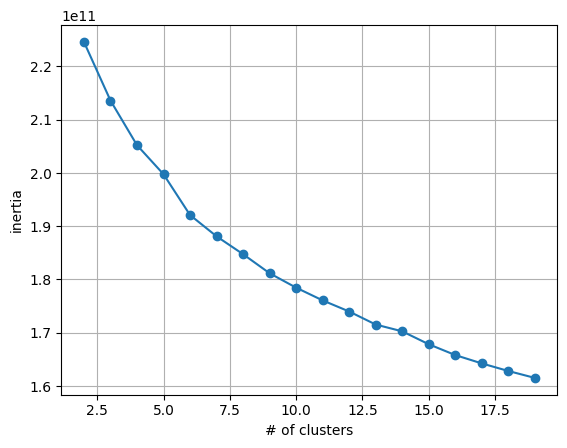

In [230]:
plt.plot(k_values, inertias, 'o-')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

In [231]:
final_kmeans = KMeans(n_clusters=6, random_state=42)
final_kmeans.fit(X=X)
final_kmeans.inertia_

192102859541.1246

In [232]:
final_kmeans.cluster_centers_.shape   #> (6, 784) -> (클러스터 개수, 특성 개수)

(6, 784)

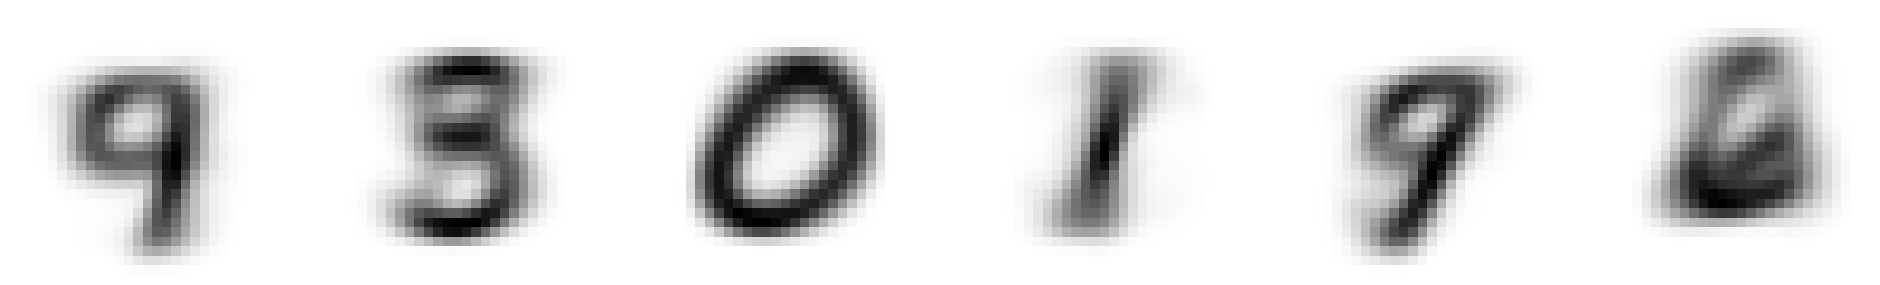

In [234]:
n_clusters = len(final_kmeans.cluster_centers_)
fig, ax = plt.subplots(1, n_clusters, figsize=(4*n_clusters, 4))

for i, center in enumerate(cluster_centers):
    ax[i].imshow(center.reshape(28, 28), cmap=plt.cm.binary)
    ax[i].axis('off')

plt.show()